# Gradient Descent

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Hypothesis: h_w(x) = w_0 + w_1 * x_1
def h_w(x, w):
    return w[0] + w[1] * x  # equivalent to w_0 + w_1 * x

In [4]:
def generate_data(n=50, noise=5.0):
    np.random.seed(42)
    X = np.linspace(-10, 10, n)
    # Ground truth line: y = 3x + 8
    true_slope = 3
    true_intercept = 8
    noise = np.random.randn(n) * noise
    y = true_slope * X + true_intercept + noise
    return X, y

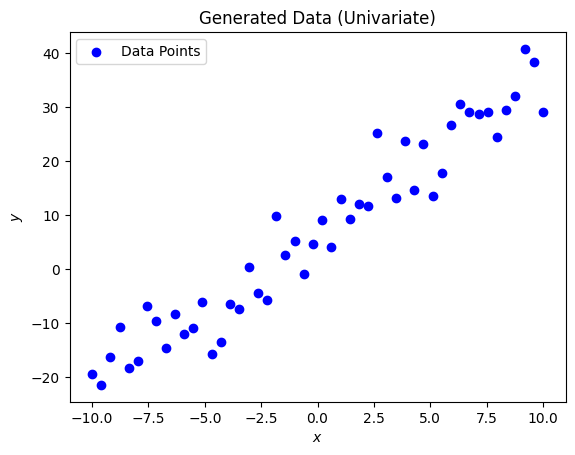

In [5]:
X, y = generate_data(n=50, noise=5.0)
plt.scatter(X, y, color='blue', label='Data Points')
plt.title("Generated Data (Univariate)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

In [49]:
def cost_function(X, y, w):
    return np.sum(h_w(X, w) - y)**2 / len(X)
def Gradient_Descent(X, y, w, num_iteration, alpha):
    m=len(X)
    cost_history = []
    w_history = [w.copy()]
    for i in range(num_iteration):
        gradient_w0 = np.sum(h_w(X, w) - y) / m
        gradient_w1 = np.sum((h_w(X, w) - y) * X) / m
        w[0] -= alpha*gradient_w0
        w[1] -= alpha*gradient_w1
        cost_history.append(cost_function(X, y, w))
        w_history.append(w.copy())

    return w, cost_history, w_history
w=[0, 0]
w_opt, cost_history, w_history = Gradient_Descent(X=X, y=y, w=w, num_iteration=150, alpha=0.01)
    
w0_val = np.linspace(-10, 20, 100)
w1_val = np.linspace(-1, 5, 100)
j_val = np.zeros((len(w0_val), len(w1_val) ))

for i in range(w0_val):
    for j in range(w1_val):
        w = [w0_val[i], w1_val[j]]
        j_val[i][j] = cost_function(X, y, w)

np.float64(2.8550415012704433)

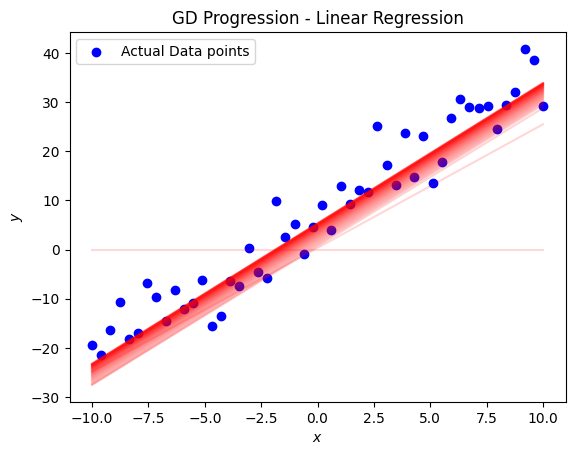

In [59]:
for idx, w in enumerate(w_history[::num_iters // 100]):
    alpha = 0.15 + 0.85*(idx) / 100
    plt.plot(X, h_w(X, w), color='red', alpha=alpha)
plt.scatter(X, y, c='b', label = 'Actual Data points')
#plt.plot(X, h_w(X, w_final), color='red', lw=2, label='Final Line')

plt.title("GD Progression - Linear Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

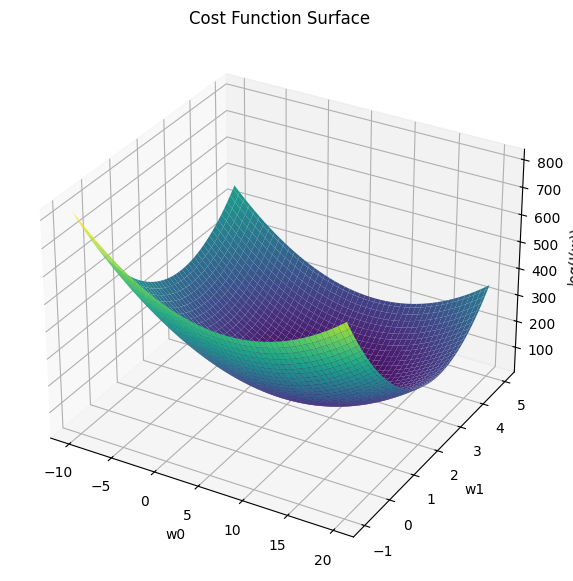

In [60]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, J_vals.T, cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface")
plt.show()

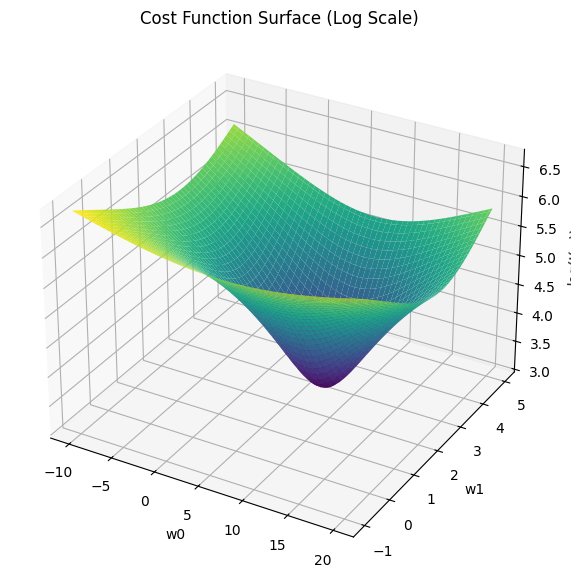

In [61]:
# 3D Plot of log J(w)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0, W1 = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0, W1, np.log(J_vals.T), cmap='viridis')
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('log(J(w))')
plt.title("Cost Function Surface (Log Scale)")
plt.show()